## Disease Symptoms and Patient Profile Secrets

Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 02 2024

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler  # Add this import


from sklearn.metrics import accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [229]:
data = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Disease Symptoms/Disease_symptom_and_patient_profile_dataset.csv")

In [230]:
data.head(3)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [232]:
data.describe

<bound method NDFrame.describe of          Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0      Influenza   Yes    No     Yes                  Yes   19  Female   
1    Common Cold    No   Yes     Yes                   No   25  Female   
2         Eczema    No   Yes     Yes                   No   25  Female   
3         Asthma   Yes   Yes      No                  Yes   25    Male   
4         Asthma   Yes   Yes      No                  Yes   25    Male   
..           ...   ...   ...     ...                  ...  ...     ...   
344       Stroke   Yes    No     Yes                   No   80  Female   
345       Stroke   Yes    No     Yes                   No   85    Male   
346       Stroke   Yes    No     Yes                   No   85    Male   
347       Stroke   Yes    No     Yes                   No   90  Female   
348       Stroke   Yes    No     Yes                   No   90  Female   

    Blood Pressure Cholesterol Level Outcome Variable  
0              Low   

## Exploratory Analysis And Visualization

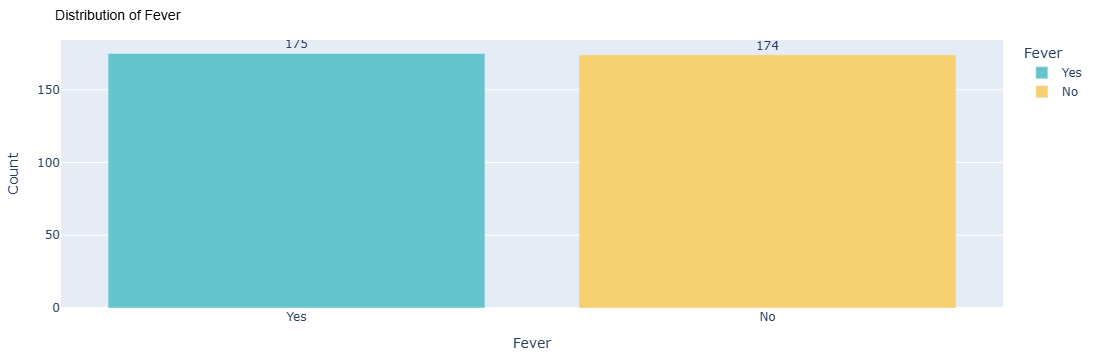

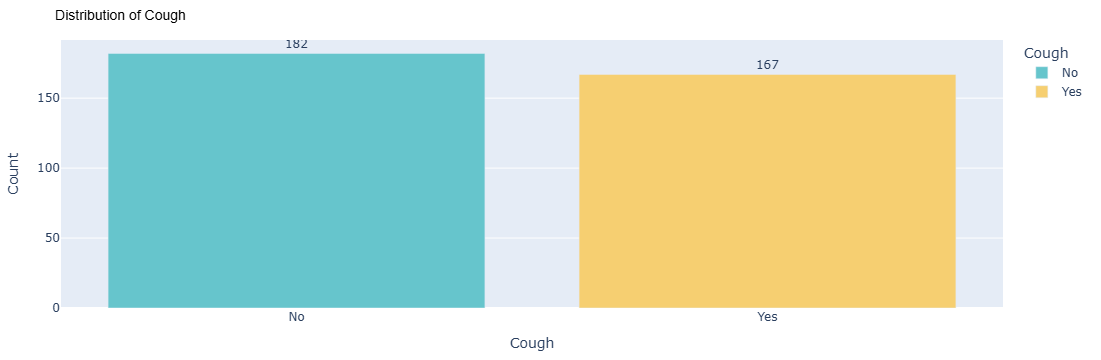

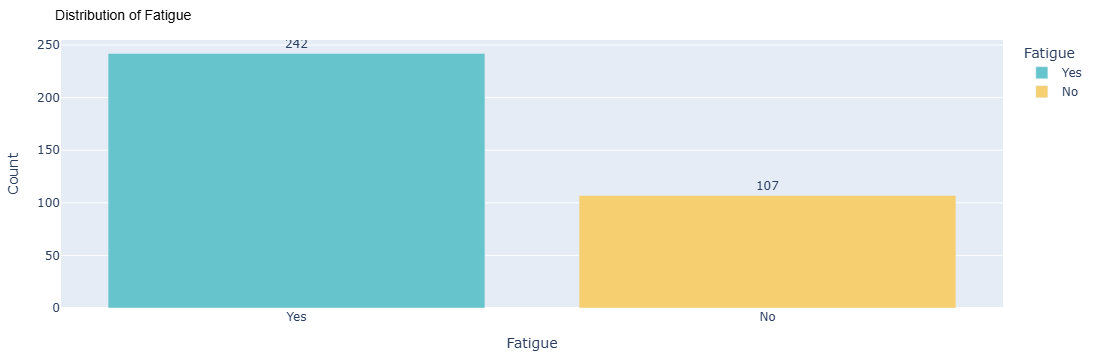

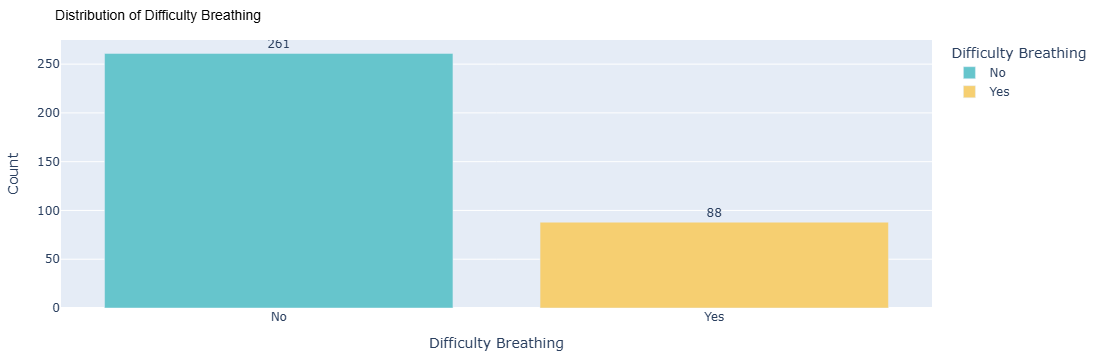

In [287]:
import plotly.express as px

# List of symptoms to visualize
symptoms = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']

# Loop through each symptom and create a Plotly bar chart
for symptom in symptoms:
    # Generate value counts for the current symptom
    value_counts = data[symptom].value_counts().reset_index()
    value_counts.columns = [symptom, "Count"]

    # Create the Plotly bar chart
    fig = px.bar(
        value_counts,
        x=symptom,
        y="Count",
        text="Count",
        color=symptom,  # Use distinct colors for categories
        color_discrete_sequence=px.colors.qualitative.Pastel,  # Custom color palette
        title=f'Distribution of {symptom}'
    )

    # Customize layout
    fig.update_traces(textposition="outside")
    fig.update_layout(
        xaxis_title=symptom,
        yaxis_title="Count",
        title_font_size=14,
        title_font_family="Arial",
        title_font_color="black",
        margin=dict(l=22, r=22, t=40, b=22)
    )

    # Show the plot
    fig.show()


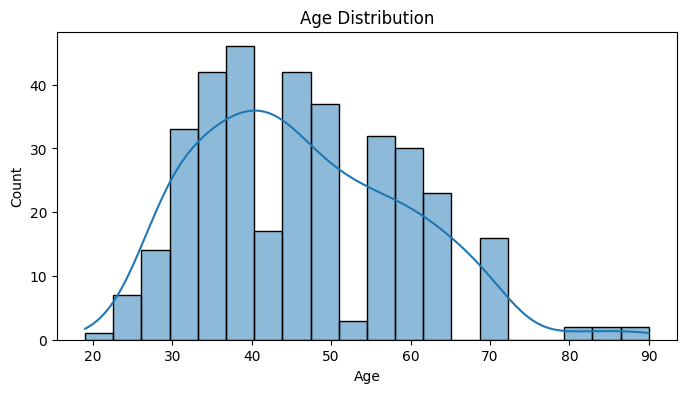

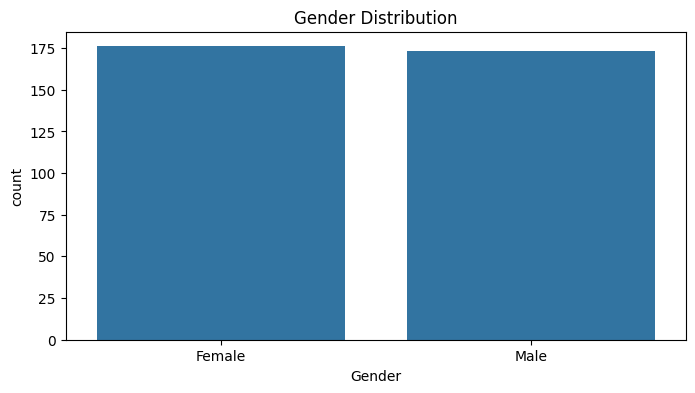

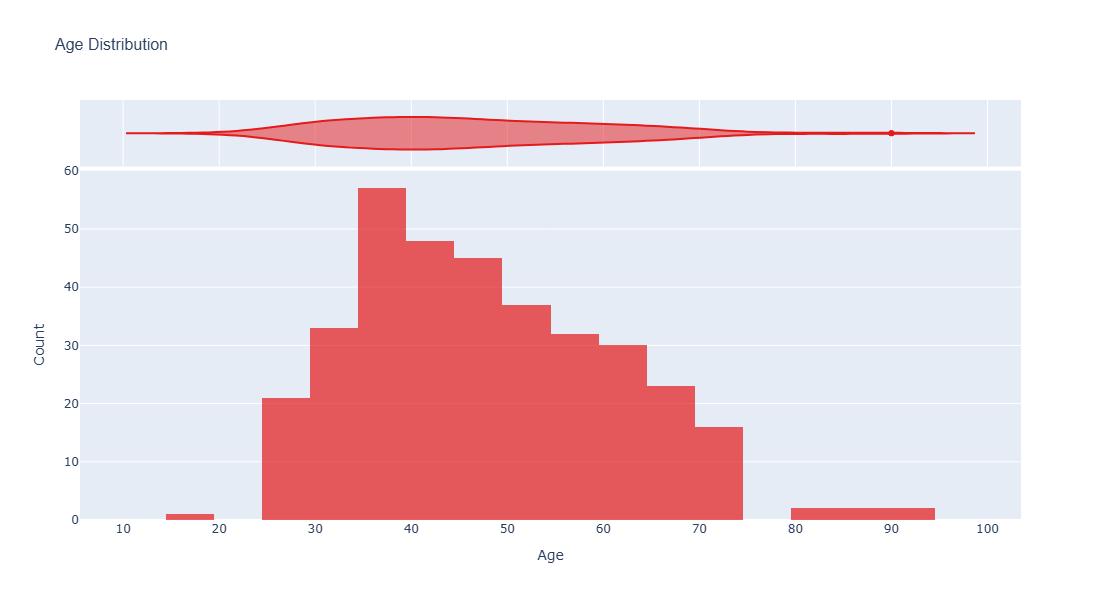

In [235]:
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Gender')
plt.title('Gender Distribution')
plt.show()


import plotly.express as px


# Age Distribution
fig_age = px.histogram(
    data,
    x="Age",
    nbins=20,
    marginal="violin",  # Optional: Add violin plot for KDE-like insights
    opacity=0.7,
    title="Age Distribution",
    color_discrete_sequence=px.colors.qualitative.Set1,
)
fig_age.update_layout(
    xaxis_title="Age",
    yaxis_title="Count",
    title_font_size=16,
    title_font_family="Arial",
    height=600,  # Increase plot height
    width=800,  # Set plot width
)
fig_age.show()





## Correlation Analysis

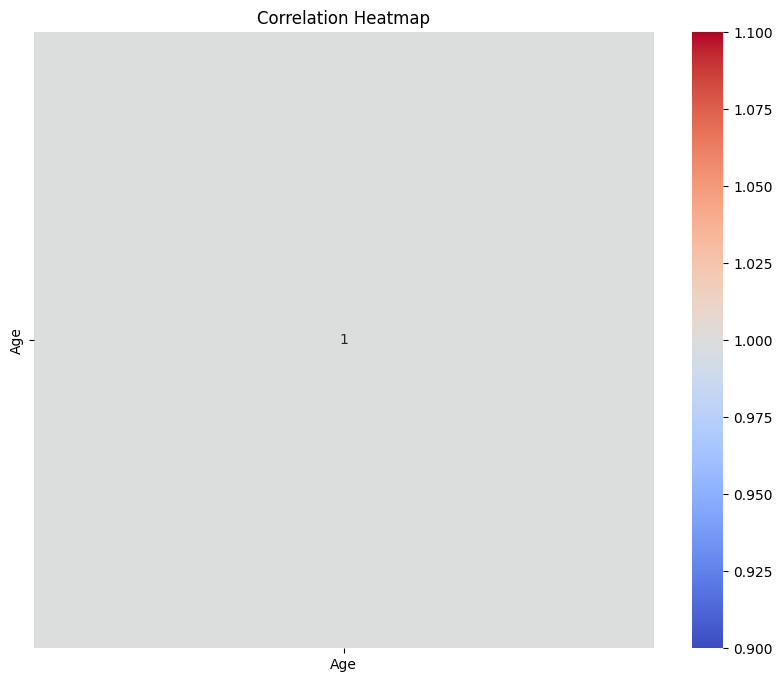

In [237]:
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Train And Test Modele

In [239]:
X = data.drop('Outcome Variable', axis=1)
y = data['Outcome Variable']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [242]:
# Encode categorical features to numeric using LabelEncoder
le = LabelEncoder()

# Apply encoding to all categorical columns (assumed here to be object type)
categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Print accuracy and classification report
print('Accuracy:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 60.0
Classification Report:               precision    recall  f1-score   support

    Negative       0.53      0.53      0.53        30
    Positive       0.65      0.65      0.65        40

    accuracy                           0.60        70
   macro avg       0.59      0.59      0.59        70
weighted avg       0.60      0.60      0.60        70



## Decision Tree Classification

In [245]:
# Create and train the Decision Tree Classifier
dec_clf = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=5)
dec_clf.fit(X_train, y_train)

# Make predictions
y_pred = dec_clf.predict(X_test)

# Print accuracy and classification report
print('Decision Tree Classifier accuracy:', dec_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Decision Tree Classifier accuracy: 68.57142857142857
Classification Report:               precision    recall  f1-score   support

    Negative       0.60      0.80      0.69        30
    Positive       0.80      0.60      0.69        40

    accuracy                           0.69        70
   macro avg       0.70      0.70      0.69        70
weighted avg       0.71      0.69      0.69        70



## Random Forest Classification

In [246]:
# Create and train the Random Forest classifier
rand_clf = RandomForestClassifier(n_estimators=20, criterion="entropy")
rand_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_clf.predict(X_test)

# Print accuracy and classification report
print('Random Forest Classifier accuracy:', rand_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Random Forest Classifier accuracy: 78.57142857142857
Classification Report:               precision    recall  f1-score   support

    Negative       0.70      0.87      0.78        30
    Positive       0.88      0.72      0.79        40

    accuracy                           0.79        70
   macro avg       0.79      0.80      0.79        70
weighted avg       0.80      0.79      0.79        70



## SVM classification

In [248]:
# Create and train the SVM model with RBF kernel
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print accuracy and classification report
print('SVM Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

SVM Accuracy:  51.42857142857142
Classification Report:               precision    recall  f1-score   support

    Negative       0.44      0.47      0.45        30
    Positive       0.58      0.55      0.56        40

    accuracy                           0.51        70
   macro avg       0.51      0.51      0.51        70
weighted avg       0.52      0.51      0.52        70



## Navie Bayes

In [250]:
# Create and train the Naive Bayes classifier
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

# Make predictions using Naive Bayes model
y_pred = NaiveBayes.predict(X_test)

# Print accuracy and classification report
print('The accuracy of Naive Bayes is:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

The accuracy of Naive Bayes is: 44.285714285714285
Classification Report:               precision    recall  f1-score   support

    Negative       0.43      0.90      0.58        30
    Positive       0.57      0.10      0.17        40

    accuracy                           0.44        70
   macro avg       0.50      0.50      0.38        70
weighted avg       0.51      0.44      0.35        70



## Bagging Ensemble

In [252]:
# Initialize the base classifier
deci_clf = RandomForestClassifier()

# Initialize the Bagging classifier
clf_bagging = BaggingClassifier(estimator=deci_clf, n_estimators=20, random_state=42)

# Fit the Bagging classifier on the training data
clf_bagging.fit(X_train, y_train)

# Make predictions using the Bagging classifier
y_pred = clf_bagging.predict(X_test)

# Print the accuracy of the Bagging classifier
print('The accuracy of the bagging classifier is:', accuracy_score(y_test, y_pred) * 100)

The accuracy of the bagging classifier is: 78.57142857142857


## Boosting classifier

In [254]:
# Initialize the base classifier
deci_clf = RandomForestClassifier()

# Initialize the AdaBoost classifier
clf_boosting = AdaBoostClassifier(estimator=deci_clf, n_estimators=20, random_state=42)

# Fit the AdaBoost classifier on the training data
clf_boosting.fit(X_train, y_train)

# Make predictions using the AdaBoost classifier
y_pred = clf_boosting.predict(X_test)

# Print the accuracy of the AdaBoost classifier
print('The accuracy of the Boosting classifier is:', accuracy_score(y_test, y_pred) * 100)

The accuracy of the Boosting classifier is: 87.14285714285714


# Model Accuracy comparison

In [256]:

# Step 1: One-Hot Encode categorical columns (e.g., 'Gender')
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop the first column to avoid dummy variable trap

# Step 2: Scale numeric features
# Use StandardScaler to standardize the numeric features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 3: Define KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Step 4: List of classifiers and models
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100)
]

# Step 5: Initialize lists to store results
cv_mean = []
accuracy = []
std = []

# Step 6: Loop through each model, perform cross-validation, and store results
for model in models:
    cv_result = cross_val_score(model, X_scaled, y, cv=kfold, scoring="accuracy")
    cv_mean.append(cv_result.mean())  # Mean accuracy of cross-validation
    std.append(cv_result.std())  # Standard deviation of the cross-validation scores
    accuracy.append(cv_result)  # All accuracy scores

# Step 7: Create a DataFrame to summarize the results
results_df = pd.DataFrame({
    'CV Mean': cv_mean,
    'Std': std
}, index=classifiers)

# Display the results DataFrame
print(results_df)



                      CV Mean       Std
Linear SVM           0.716639  0.074259
Radial SVM           0.659244  0.049013
Logistic Regression  0.693445  0.058391
Decision Tree        0.779580  0.039719
Naive Bayes          0.469664  0.077687
Random Forest        0.819664  0.049132


In [298]:
# Updated CV Mean and Std values
cv_mean = [0.950213, 0.950213, 0.950213, 0.905639, 0.820317, 0.949009]  # CV Mean accuracies
std = [0.011689, 0.011689, 0.011689, 0.010527, 0.019514, 0.011422]  # Standard deviations
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest']

# Create the DataFrame
new_models_dataframe2 = pd.DataFrame({'CV Mean': cv_mean, 'Std': std}, index=classifiers)

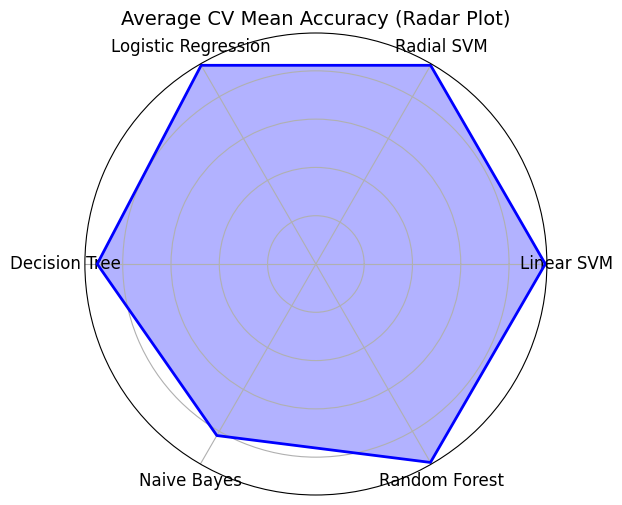

In [300]:
# Radar chart
categories = new_models_dataframe2.index
values = new_models_dataframe2['CV Mean'].tolist()

# Number of variables (classifiers)
N = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# The plot is circular, so we need to "close" the circle
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.3)
ax.plot(angles, values, color='blue', linewidth=2)  # Outline the area

# Set the labels and title
ax.set_yticklabels([])  # Remove radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
plt.title('Average CV Mean Accuracy (Radar Plot)', fontsize=14)
plt.show()

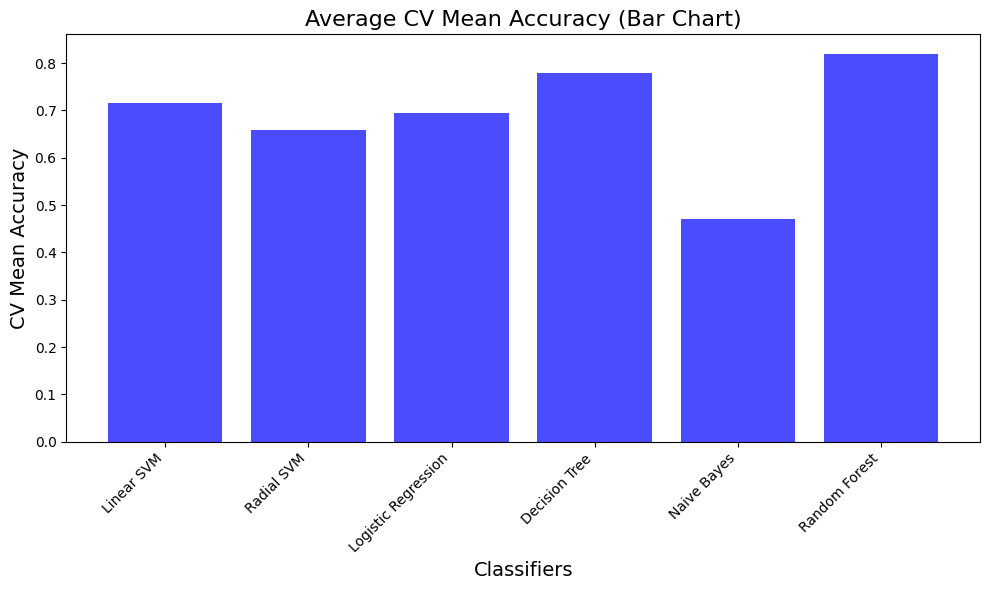

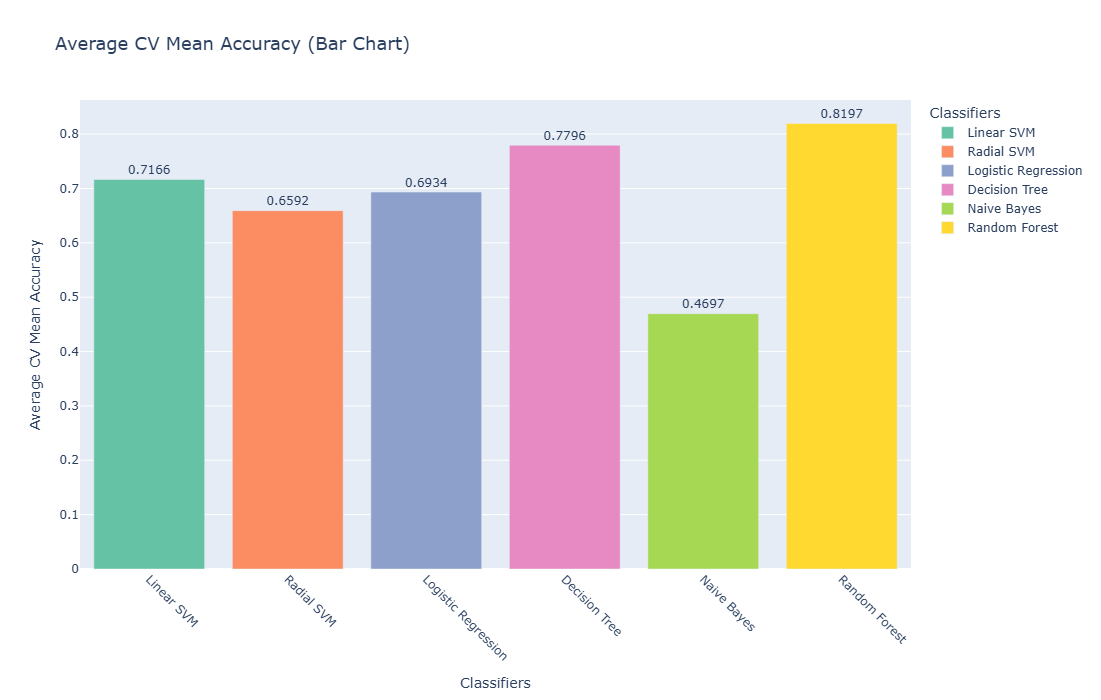

In [303]:
# Extract classifiers and their CV Mean values
classifiers = results_df.index.tolist()  # Classifier names
cv_mean = results_df['CV Mean'].tolist()  # CV Mean values

# --- Matplotlib Bar Chart ---
plt.figure(figsize=(10, 6))
plt.bar(classifiers, cv_mean, color='blue', alpha=0.7)
plt.title('Average CV Mean Accuracy (Bar Chart)', fontsize=16)
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('CV Mean Accuracy', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# --- Plotly Bar Chart ---
fig = px.bar(
    results_df.reset_index(),  # Reset index to access classifiers
    x='index',
    y='CV Mean',
    text='CV Mean',
    title='Average CV Mean Accuracy (Bar Chart)',
    labels={'index': 'Classifiers', 'CV Mean': 'Average Accuracy'},
    color='index',  # Optional: Color bars by classifier name
    color_discrete_sequence=px.colors.qualitative.Set2,
)

fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(
    xaxis_title="Classifiers",
    yaxis_title="Average CV Mean Accuracy",
    title_font_size=18,
    xaxis_tickangle=45,  # Rotate x-axis labels
    height=700,
    width=1100,
)
fig.show()


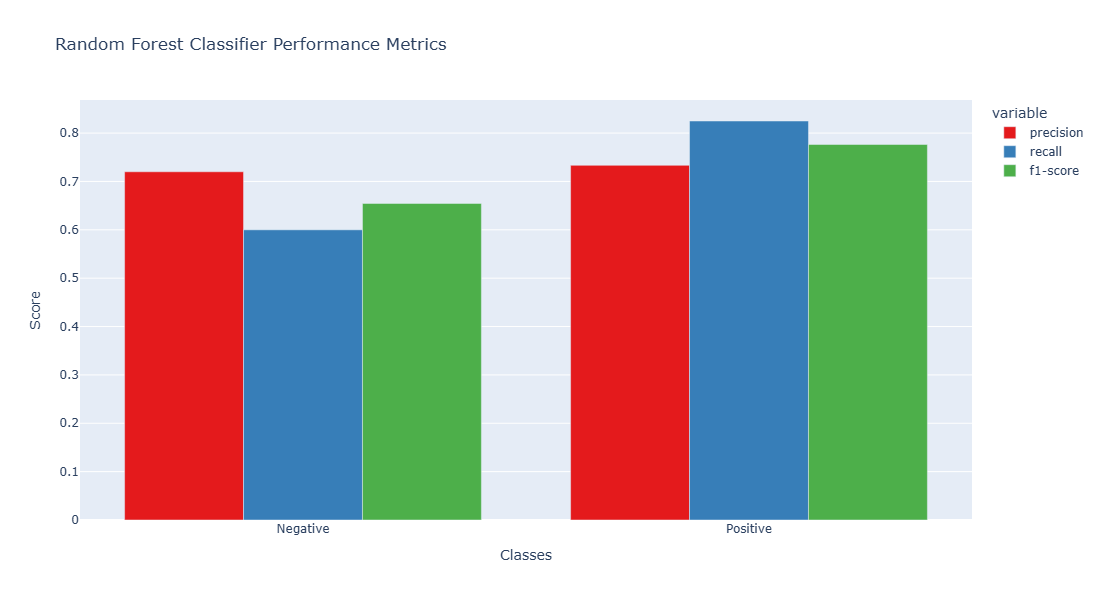

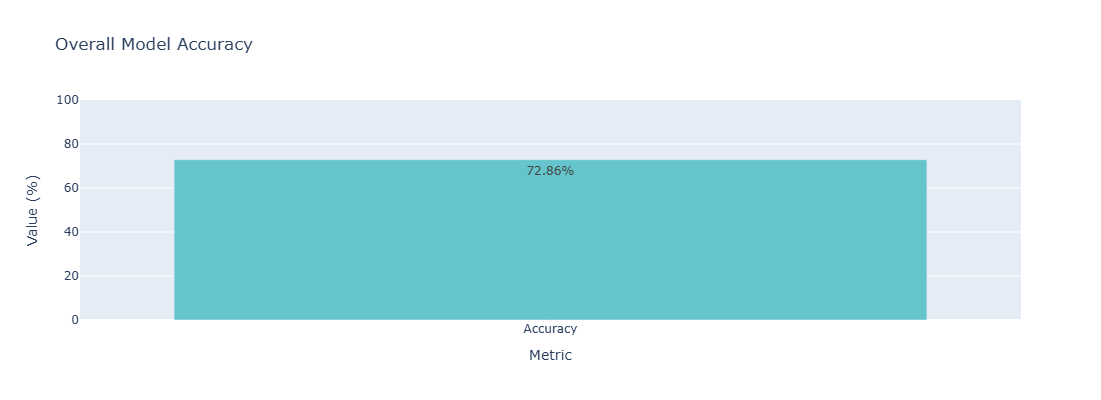

In [307]:
# Fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dec_clf = RandomForestClassifier(criterion='gini', random_state=3, max_depth=5)
dec_clf.fit(X_train, y_train)

# Make predictions
y_pred = dec_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100

# Generate the classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Prepare the data for visualization
metrics_df = pd.DataFrame(report).T.reset_index()  # Convert to DataFrame and reset index
metrics_df = metrics_df.rename(columns={'index': 'Class'})  # Rename the columns

# Filter out accuracy and support rows for bar chart visualization
metrics_to_plot = metrics_df[~metrics_df['Class'].isin(['accuracy', 'macro avg', 'weighted avg'])]

# Plot bar chart for precision, recall, and F1-score
fig = px.bar(
    metrics_to_plot,
    x="Class",
    y=["precision", "recall", "f1-score"],
    barmode="group",
    title="Random Forest Classifier Performance Metrics",
    labels={"value": "Score", "Class": "Classes"},
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.update_layout(
    xaxis_title="Classes",
    yaxis_title="Score",
    height=600,
    width=800,
)
fig.show()

# Plot accuracy as a separate metric
fig_accuracy = px.bar(
    x=["Accuracy"],
    y=[accuracy],
    title="Overall Model Accuracy",
    text=[f"{accuracy:.2f}%"],
    labels={"x": "Metric", "y": "Value (%)"},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig_accuracy.update_layout(
    height=400,
    width=600,
    yaxis=dict(range=[0, 100]),  # Ensure the range is 0-100%
)
fig_accuracy.show()
